# 학습 관련 기술들 

- 파라미터 최적값 탐색 
- 가중치 파라미터 초기값
- 하이퍼파라미터 설정
- 가중치 감소, 드롭아웃 등 오버피팅 대응
- 배치 정규화

### 매개변수 갱신 
#### 확률적 경사 하강법 SGD

In [1]:
# 경사 방향으로 학습률 만큼 이동
# 최적화 방식의 모듈화
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

#### SGD의 단점

#### 비등방성 함수(anistropy, 방향에 따라 성질,기울기가 달라지는 함수 ) 에서 탐색경로가 비효율적 
![](img/057.jpg)

### 모멘텀
##### 물리학에서 처럼 기울기 방향으로 힘을 받아 가속되는 원리를 사용

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum =0.9):
        self.lr = lr 
        self.momentum = momentum #가속도
        self.v = None #속도
        
    def update(self, params, grads):
        if self.v is None:
            self.v ={}
            for key, val in params.items():
                self.v[key] = np.zero_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
            
            

### AdaGrad
##### 학습률을 점차 감소시키는 방법이 있음 Learning Rate Decay
##### h값에 dL/dw 각 원소를 제곱하여 더함 / 이후 학습률에 1/h^1/2 를 곱하여 갱신함 
##### 매개변수 원소중 갱신이 크게된 경우는 학습률이 낮아짐
##### 매개변수 별로 학습률 감소가 다르게 적용됨
##### 유사한 방식으로 RMSProp가 있음 지수이동평균으로 과거 기울기 반영 규모를 기하급수적으로 감소시킴

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h ={}
            for key, val in params.itmes():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key]) + 1e-7) # 0으로 나누게 되는 경우를 방지함

### Adam
##### AdaGrad + Momentum 

Weight init activation histogram

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
def ReLU(x):
    return np.maximum(0,x)

In [13]:
def tanh(x):
    return np.tanh(x)

In [30]:
input_data = np.random.randn(1000,100) # 랜덤데이터 생성
node_num = 100
hidden_layer_size = 5
activations ={}

x= input_data

In [37]:
for i in range(hidden_layer_size):
    if i !=0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1 # 가중치 생성
    #w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    
    a= np.dot(x,w) #퍼셉트론
    z= sigmoid(a) #활성함수
    #z= ReLU(a)
    
    activations[i] = z
        

In [38]:
activations

{0: array([[0.54434181, 0.90256506, 0.61757648, ..., 0.7598807 , 0.15804572,
         0.99912282],
        [0.54434178, 0.90256508, 0.61757648, ..., 0.75988071, 0.15804583,
         0.99912282],
        [0.5443418 , 0.90256506, 0.61757614, ..., 0.75988059, 0.15804584,
         0.99912282],
        ...,
        [0.54434174, 0.90256502, 0.61757633, ..., 0.7598804 , 0.15804602,
         0.99912282],
        [0.54434198, 0.90256501, 0.61757677, ..., 0.75988068, 0.15804584,
         0.99912282],
        [0.54434156, 0.90256504, 0.61757638, ..., 0.75988067, 0.15804587,
         0.99912282]]),
 1: array([[0.99368598, 0.99999196, 0.00134821, ..., 0.04536046, 0.00947261,
         0.99791765],
        [0.993686  , 0.99999196, 0.00134821, ..., 0.04536044, 0.00947263,
         0.99791765],
        [0.993686  , 0.99999196, 0.00134821, ..., 0.04536043, 0.00947261,
         0.99791766],
        ...,
        [0.993686  , 0.99999196, 0.00134821, ..., 0.04536043, 0.00947261,
         0.99791766],
      

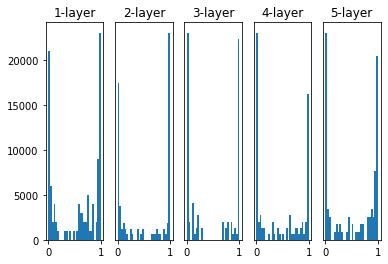

In [39]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([],[])
        #plt.xlim(0.1, 1)
        #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()
#표준편차가 1인 정규분포를 이용한 경우 --> 1,0으로 치우치는 기울기 소실 발생

In [40]:
input_data = np.random.randn(1000,100) # 랜덤데이터 생성
node_num = 100
hidden_layer_size = 5
activations ={}

x= input_data

for i in range(hidden_layer_size):
    if i !=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    
    a= np.dot(x,w) #퍼셉트론
    z= sigmoid(a) #활성함수
    #z= ReLU(a)
    
    activations[i] = z
        

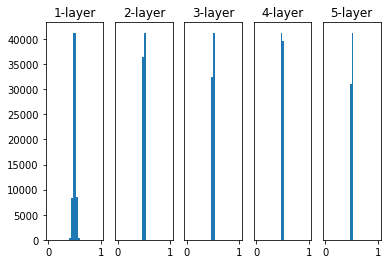

In [41]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([],[])
        #plt.xlim(0.1, 1)
        #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()
#표준편차 0.01인 경우 0.5에 집중되는 경향을 보임 --> 다수의 뉴런이 비슷한 값을 출력함 --> 표현력 제한됨

### Xavier 초기값
#### 앞 계층의 노드가 n 개일 경우 표준편차 : 1/sqrt(n) 사용
![](img/058.jpg)

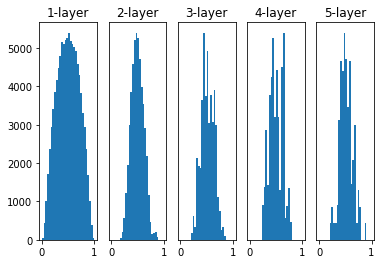

In [48]:
input_data = np.random.randn(1000,100) # 랜덤데이터 생성
node_num = 100
hidden_layer_size = 5
activations ={}

x= input_data

for i in range(hidden_layer_size):
    if i !=0:
        x = activations[i-1]
    
   
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    
    a= np.dot(x,w) #퍼셉트론
    z= sigmoid(a) #활성함수
    #z= ReLU(a)
    
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([],[])
        #plt.xlim(0.1, 1)
        #plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()
#상대적으로 고른 분포를 보임

#### sigmoid , tanh 함수는 좌우 대칭이라 중앙 부분이 선형 --> Xavier 적절
#### ReLU --> He 초기값 

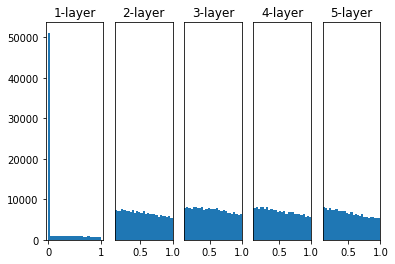

In [50]:
input_data = np.random.randn(1000,100) # 랜덤데이터 생성
node_num = 100
hidden_layer_size = 5
activations ={}

x= input_data

for i in range(hidden_layer_size):
    if i !=0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num) #He 초기값
    
    a= np.dot(x,w) #퍼셉트론
    z= ReLU(a)
    
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: 
        plt.yticks([],[])
        plt.xlim(0.1, 1)
        plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()
#상대적으로 고른 분포를 보임

### 배치 정규화
#### 가중치의 초기값을 적절히 설정하면 학습수행이 원활해진다. 
#### --> 각 층이 활성화를 적당히 퍼트리도록 강제하는 아이디어
#### 학습이 빨라지고, 초기값 의존도가 낮아지며, 오버피팅을 억제!
![](img/059.jpg)